In [10]:
# Standard imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.stats import norm, beta, expon, uniform

In [11]:
# Mixture of normal distributions
class norm_mix():
    def __init__(self, As, mus, sigs):
        self.As, self.mus, self.sigs = As, mus, sigs
        self.norms = []
        for mu, sig in zip(mus, sigs):
            prob = norm(mu, sig)
            self.norms.append(prob)
    def pdf(self, x):
        pdf = 0.
        for A, norm in zip(self.As, self.norms):
            pdf += A*norm.pdf(x)
        return pdf

Test: 1


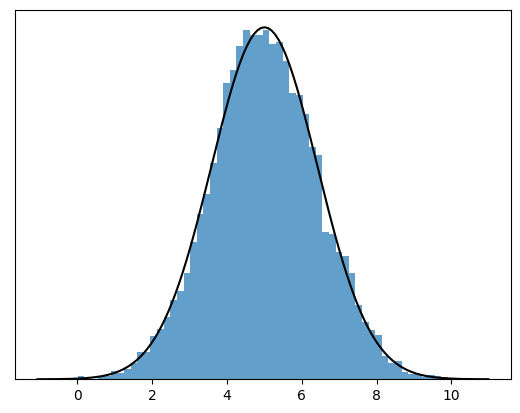

Test: 2


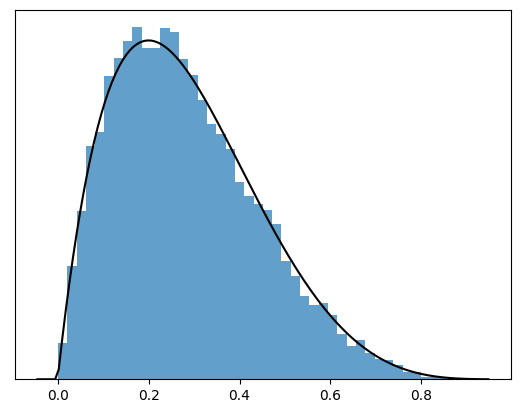

Test: 3


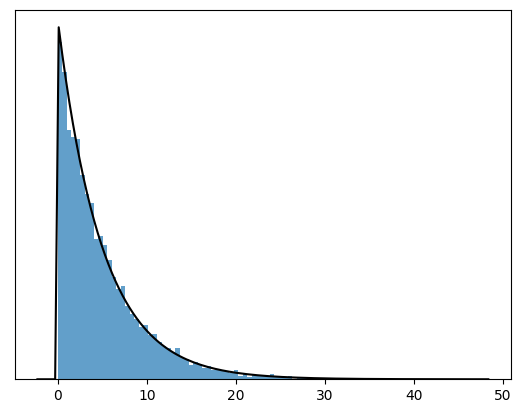

Test: 4


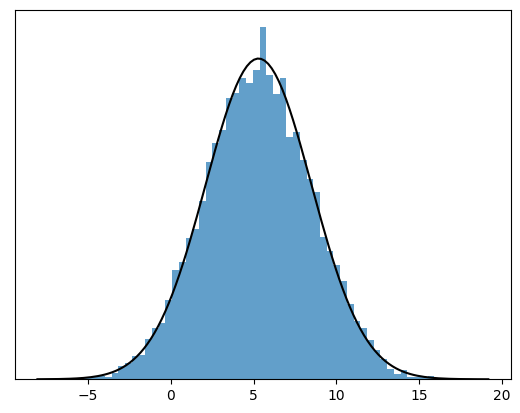

Test: 5


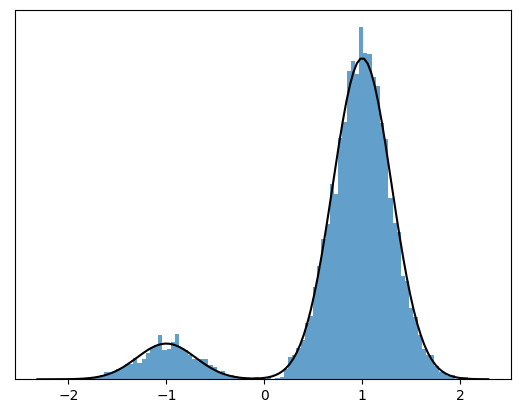

Test: 6


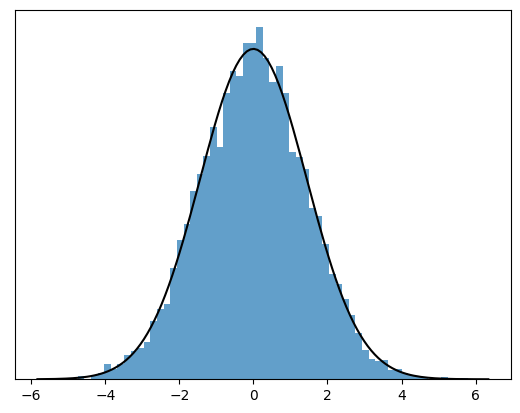

Test: 7


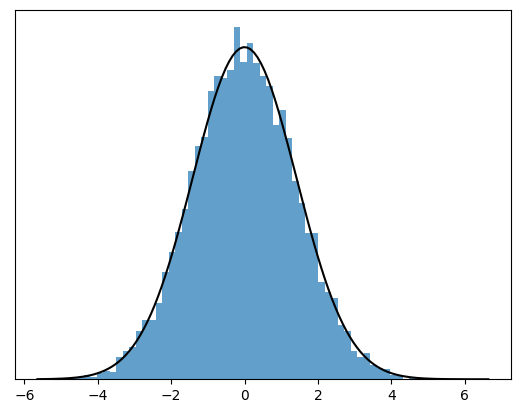

Test: 8


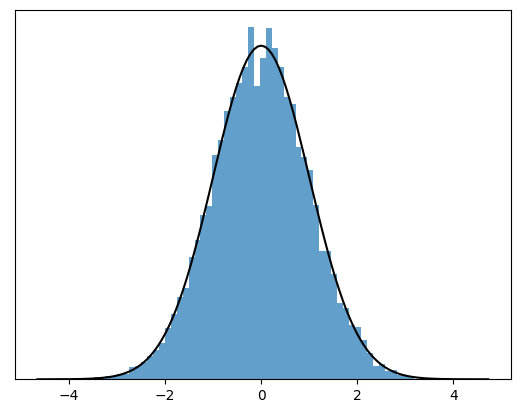

In [12]:
# Parameters
file = lambda i: '../data/probabilistic/%d.dat'%(i)
nx = 128

# Loop over tests and plot
tests = [1, 2, 3, 4, 5, 6, 7, 8]
for test in tests:

    print('Test: %d'%(test))

    if test == 1:
        p = norm(5., np.sqrt(2.))
    elif test == 2:
        p = beta(2., 5.)
    elif test == 3:
        p = expon(0., 5.)
    elif test == 4:
        p = norm(5.3, 3.2)
    elif test == 5:
        p = norm_mix([0.1, 0.9], [-1., 1.], [np.sqrt(0.09), np.sqrt(0.09)])
    elif test == 6:
        p = norm(0., 1.44)
    elif test == 7:
        p = norm(0., np.sqrt(2.))
    elif test == 8:
        p = norm(0., 1.)
    else:
        raise ValueError('Test not recognisedd')

    data = np.loadtxt(file(test))
    plt.hist(data, bins='auto', density=True, alpha=0.7)
    xlim = plt.xlim()
    x = np.linspace(xlim[0], xlim[1], nx)
    plt.plot(x, p.pdf(x), color='black')
    plt.yticks([])
    plt.show()